#Numeric Prediction--Regression Methods

---

In order for a health insurance company to make money, it needs to collect more
in yearly premiums than it spends on medical care to its beneficiaries. As a result, insurers invest a great deal of time and money in developing models that accurately forecast medical expenses for the insured population.<br>
<br>
Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population. For instance, lung cancer is more likely among smokers than non-smokers, and heart disease may be more likely among the obese.<br>
<br>
The goal of this analysis is to use patient data to estimate the average medical
care expenses for such population segments. These estimates can be used to create actuarial tables that set the price of yearly premiums higher or lower,
depending on the expected treatment costs.<br>
<br>
The insurance data set has 1338 observations of 7 variables.
<br>
We will use this file to predict the medical expenses.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
age:	      age in years<br>
sex:	      gender<br>
bmi:	      body mass index<br>
children:	how many children do they have?<br>
smoker:	  do they smoke?<br>
region:	  geographic region<br>
expenses:	yearly medical expenses<br>
<br>
Target variable: **expenses**

### 1.Upload and clean data

In [174]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [176]:
# Read data
insurance = pd.read_csv("/content/drive/MyDrive/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [177]:
# Show the head rows of a data frame
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [178]:
# Examine variable type
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [179]:
# Change categorical variables to "category"
insurance['sex'] = insurance['sex'].astype('category')
insurance['smoker'] = insurance['smoker'].astype('category')
insurance['region'] = insurance['region'].astype('category')

In [180]:
# Examine variable type
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
expenses     float64
dtype: object

Text(0.5, 1.0, 'Histogram of expenses in the insurance data set')

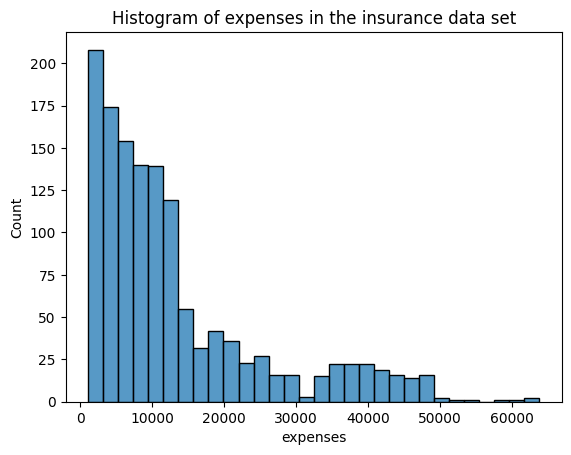

In [181]:
# Data exploration: some examples
# Histogram of insurance expenses
snsplot = sns.histplot(x='expenses', data = insurance)
snsplot.set_title("Histogram of expenses in the insurance data set")

In [182]:
# Create dummy variables
insurance = pd.get_dummies(insurance, columns=['sex','smoker','region'], drop_first=True)
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [183]:
# exploring relationships among all numeric variables: correlation matrix
insurance.corr()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
expenses,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


### 2.Partition the data set for regression model

In [184]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 8) (402, 8) (936,) (402,)


Text(0.5, 1.0, 'Histogram of expenses in the training data set')

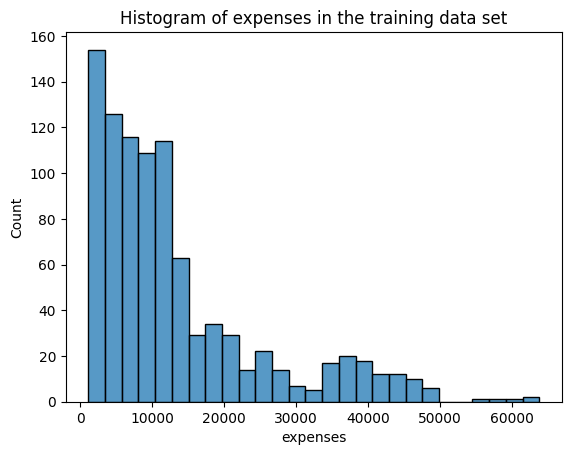

In [185]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train)
snsplot.set_title("Histogram of expenses in the training data set")

Text(0.5, 1.0, 'Histogram of expenses in the testing data set')

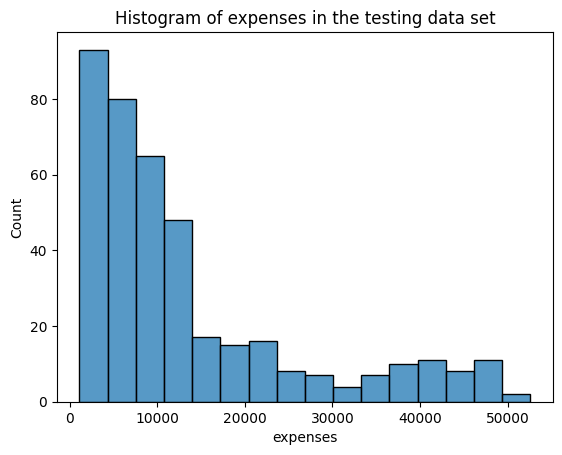

In [186]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test)
snsplot.set_title("Histogram of expenses in the testing data set")

## 3.Simple linear regression

In [187]:
# Build a simple linear regression model with only bmi as predictor
model1 = linear_model.LinearRegression()
model1.fit(predictors_train[['bmi']], target_train)

LinearRegression()

In [188]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train[['bmi']])
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     31.38
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.80e-08
Time:                        03:34:52   Log-Likelihood:                -10094.
No. Observations:                 936   AIC:                         2.019e+04
Df Residuals:                     934   BIC:                         2.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2670.4411   1924.038      1.388      0.1

Q1. How the expenses change when we increase the bmi by 1? <br>

The expenses changes by 343.4687 when we increase the bmi by 1

In [189]:
# Make predictions on testing data
prediction_on_test = model1.predict(predictors_test[['bmi']])

In [190]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 9462.742554049595
RMSE: 12300.0507536972


## 4.Multiple linear regression

In [191]:
# Build a multiple linear regression model with all predictors
model2 = linear_model.LinearRegression()
model2.fit(predictors_train, target_train)

LinearRegression()

In [192]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train[['bmi']])
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     31.38
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.80e-08
Time:                        03:34:52   Log-Likelihood:                -10094.
No. Observations:                 936   AIC:                         2.019e+04
Df Residuals:                     934   BIC:                         2.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2670.4411   1924.038      1.388      0.1

Q2. How the expenses change when we increase the bmi by 1? <br>
the expenses change by 335.3691 when we increase the bmi by 1

Q3. Do you think bmi is important in predicting expenses? why? <br>

yes, bmi is important for predicting expenses, as the p value is 0.00 which indicates that the relationship between bmi and expenses is significant

In [193]:
# Make predictions on testing data
prediction_on_test = model2.predict(predictors_test)

In [194]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 4011.4496793279827
RMSE: 5774.296305780867


## 5.Improving Model Performance:  Adding non-linear relationships

Add a higher-order "age" term

In [195]:
# add a higher-order "age" term
insurance['age2'] = insurance['age'] ** 2

In [196]:
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2
0,19,27.900,0,16884.92400,False,True,False,False,True,361
1,18,33.770,1,1725.55230,True,False,False,True,False,324
2,28,33.000,3,4449.46200,True,False,False,True,False,784
3,33,22.705,0,21984.47061,True,False,True,False,False,1089
4,32,28.880,0,3866.85520,True,False,True,False,False,1024
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False,2500
1334,18,31.920,0,2205.98080,False,False,False,False,False,324
1335,18,36.850,0,1629.83350,False,False,False,True,False,324
1336,21,25.800,0,2007.94500,False,False,False,False,True,441


In [197]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 9) (402, 9) (936,) (402,)


In [198]:
# Build a linear regression model with non-linear relationships
model3 = linear_model.LinearRegression()
model3.fit(predictors_train, target_train)

LinearRegression()

In [199]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train[['bmi']])
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     31.38
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.80e-08
Time:                        03:34:52   Log-Likelihood:                -10094.
No. Observations:                 936   AIC:                         2.019e+04
Df Residuals:                     934   BIC:                         2.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2670.4411   1924.038      1.388      0.1

In [200]:
# Make predictions on testing data
prediction_on_test = model3.predict(predictors_test)

In [201]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 3953.7290464502044
RMSE: 5707.979460017808


Add an interaction effect:

In [202]:
# add an indicator for BMI >= 30
insurance.loc[insurance['bmi'] >= 30, 'bmi30'] = 1
insurance.loc[insurance['bmi'] < 30, 'bmi30'] = 0
insurance['bmi30'] = insurance['bmi30'].astype('category')

In [203]:
# add an interaction effects bmi30*smoker
insurance['bmi30_smoker'] = insurance['bmi30'].astype(float) * insurance['smoker_yes'].astype(float)

In [204]:
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,bmi30,bmi30_smoker
0,19,27.900,0,16884.92400,False,True,False,False,True,361,0.0,0.0
1,18,33.770,1,1725.55230,True,False,False,True,False,324,1.0,0.0
2,28,33.000,3,4449.46200,True,False,False,True,False,784,1.0,0.0
3,33,22.705,0,21984.47061,True,False,True,False,False,1089,0.0,0.0
4,32,28.880,0,3866.85520,True,False,True,False,False,1024,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False,2500,1.0,0.0
1334,18,31.920,0,2205.98080,False,False,False,False,False,324,1.0,0.0
1335,18,36.850,0,1629.83350,False,False,False,True,False,324,1.0,0.0
1336,21,25.800,0,2007.94500,False,False,False,False,True,441,0.0,0.0


In [205]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 11) (402, 11) (936,) (402,)


In [206]:
# Build a linear regression model with non-linear relationships
model4 = linear_model.LinearRegression()
model4.fit(predictors_train, target_train)

LinearRegression()

In [207]:
# Show model summary
import numpy as np
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train[['bmi']])
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     31.38
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.80e-08
Time:                        03:34:53   Log-Likelihood:                -10094.
No. Observations:                 936   AIC:                         2.019e+04
Df Residuals:                     934   BIC:                         2.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2670.4411   1924.038      1.388      0.1

In [208]:
# Make predictions on testing data
prediction_on_test = model4.predict(predictors_test)

In [209]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 2308.7855209080094
RMSE: 4097.1754698883515


Q4. Compared to the previous model (model2), does this model (model4) has better performance? why?<br>

yes , as the MAE and RMSE reduced from MAE: 4011.4496793279827
RMSE: 5774.296305780867 to MAE: 2308.7855209080094
RMSE: 4097.1754698883515

## 6.Regression Tree

In [210]:
# Partition the data
insurance = insurance.drop(['age2', 'bmi30', 'bmi30_smoker'], axis=1)
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 8) (402, 8) (936,) (402,)


In [211]:
# Build a regression tree model with max_depth=3
model5 = DecisionTreeRegressor(random_state=0, max_depth=3)
model5.fit(predictors_train, target_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'smoker_yes <= 0.5\nsquared_error = 140986233.214\nsamples = 936\nvalue = 13232.916'),
 Text(0.25, 0.625, 'age <= 42.5\nsquared_error = 37737689.841\nsamples = 746\nvalue = 8616.732'),
 Text(0.125, 0.375, 'age <= 26.5\nsquared_error = 22225839.786\nsamples = 407\nvalue = 5418.786'),
 Text(0.0625, 0.125, 'squared_error = 21407144.881\nsamples = 177\nvalue = 3657.79'),
 Text(0.1875, 0.125, 'squared_error = 18632806.342\nsamples = 230\nvalue = 6773.987'),
 Text(0.375, 0.375, 'age <= 51.5\nsquared_error = 29341638.204\nsamples = 339\nvalue = 12456.153'),
 Text(0.3125, 0.125, 'squared_error = 24590724.986\nsamples = 141\nvalue = 10446.126'),
 Text(0.4375, 0.125, 'squared_error = 27798886.679\nsamples = 198\nvalue = 13887.537'),
 Text(0.75, 0.625, 'bmi <= 29.972\nsquared_error = 134204996.795\nsamples = 190\nvalue = 31357.516'),
 Text(0.625, 0.375, 'age <= 41.0\nsquared_error = 25603584.286\nsamples = 96\nvalue = 21353.205'),
 Text(0.5625, 0.125, 'squared_error = 12635440.6

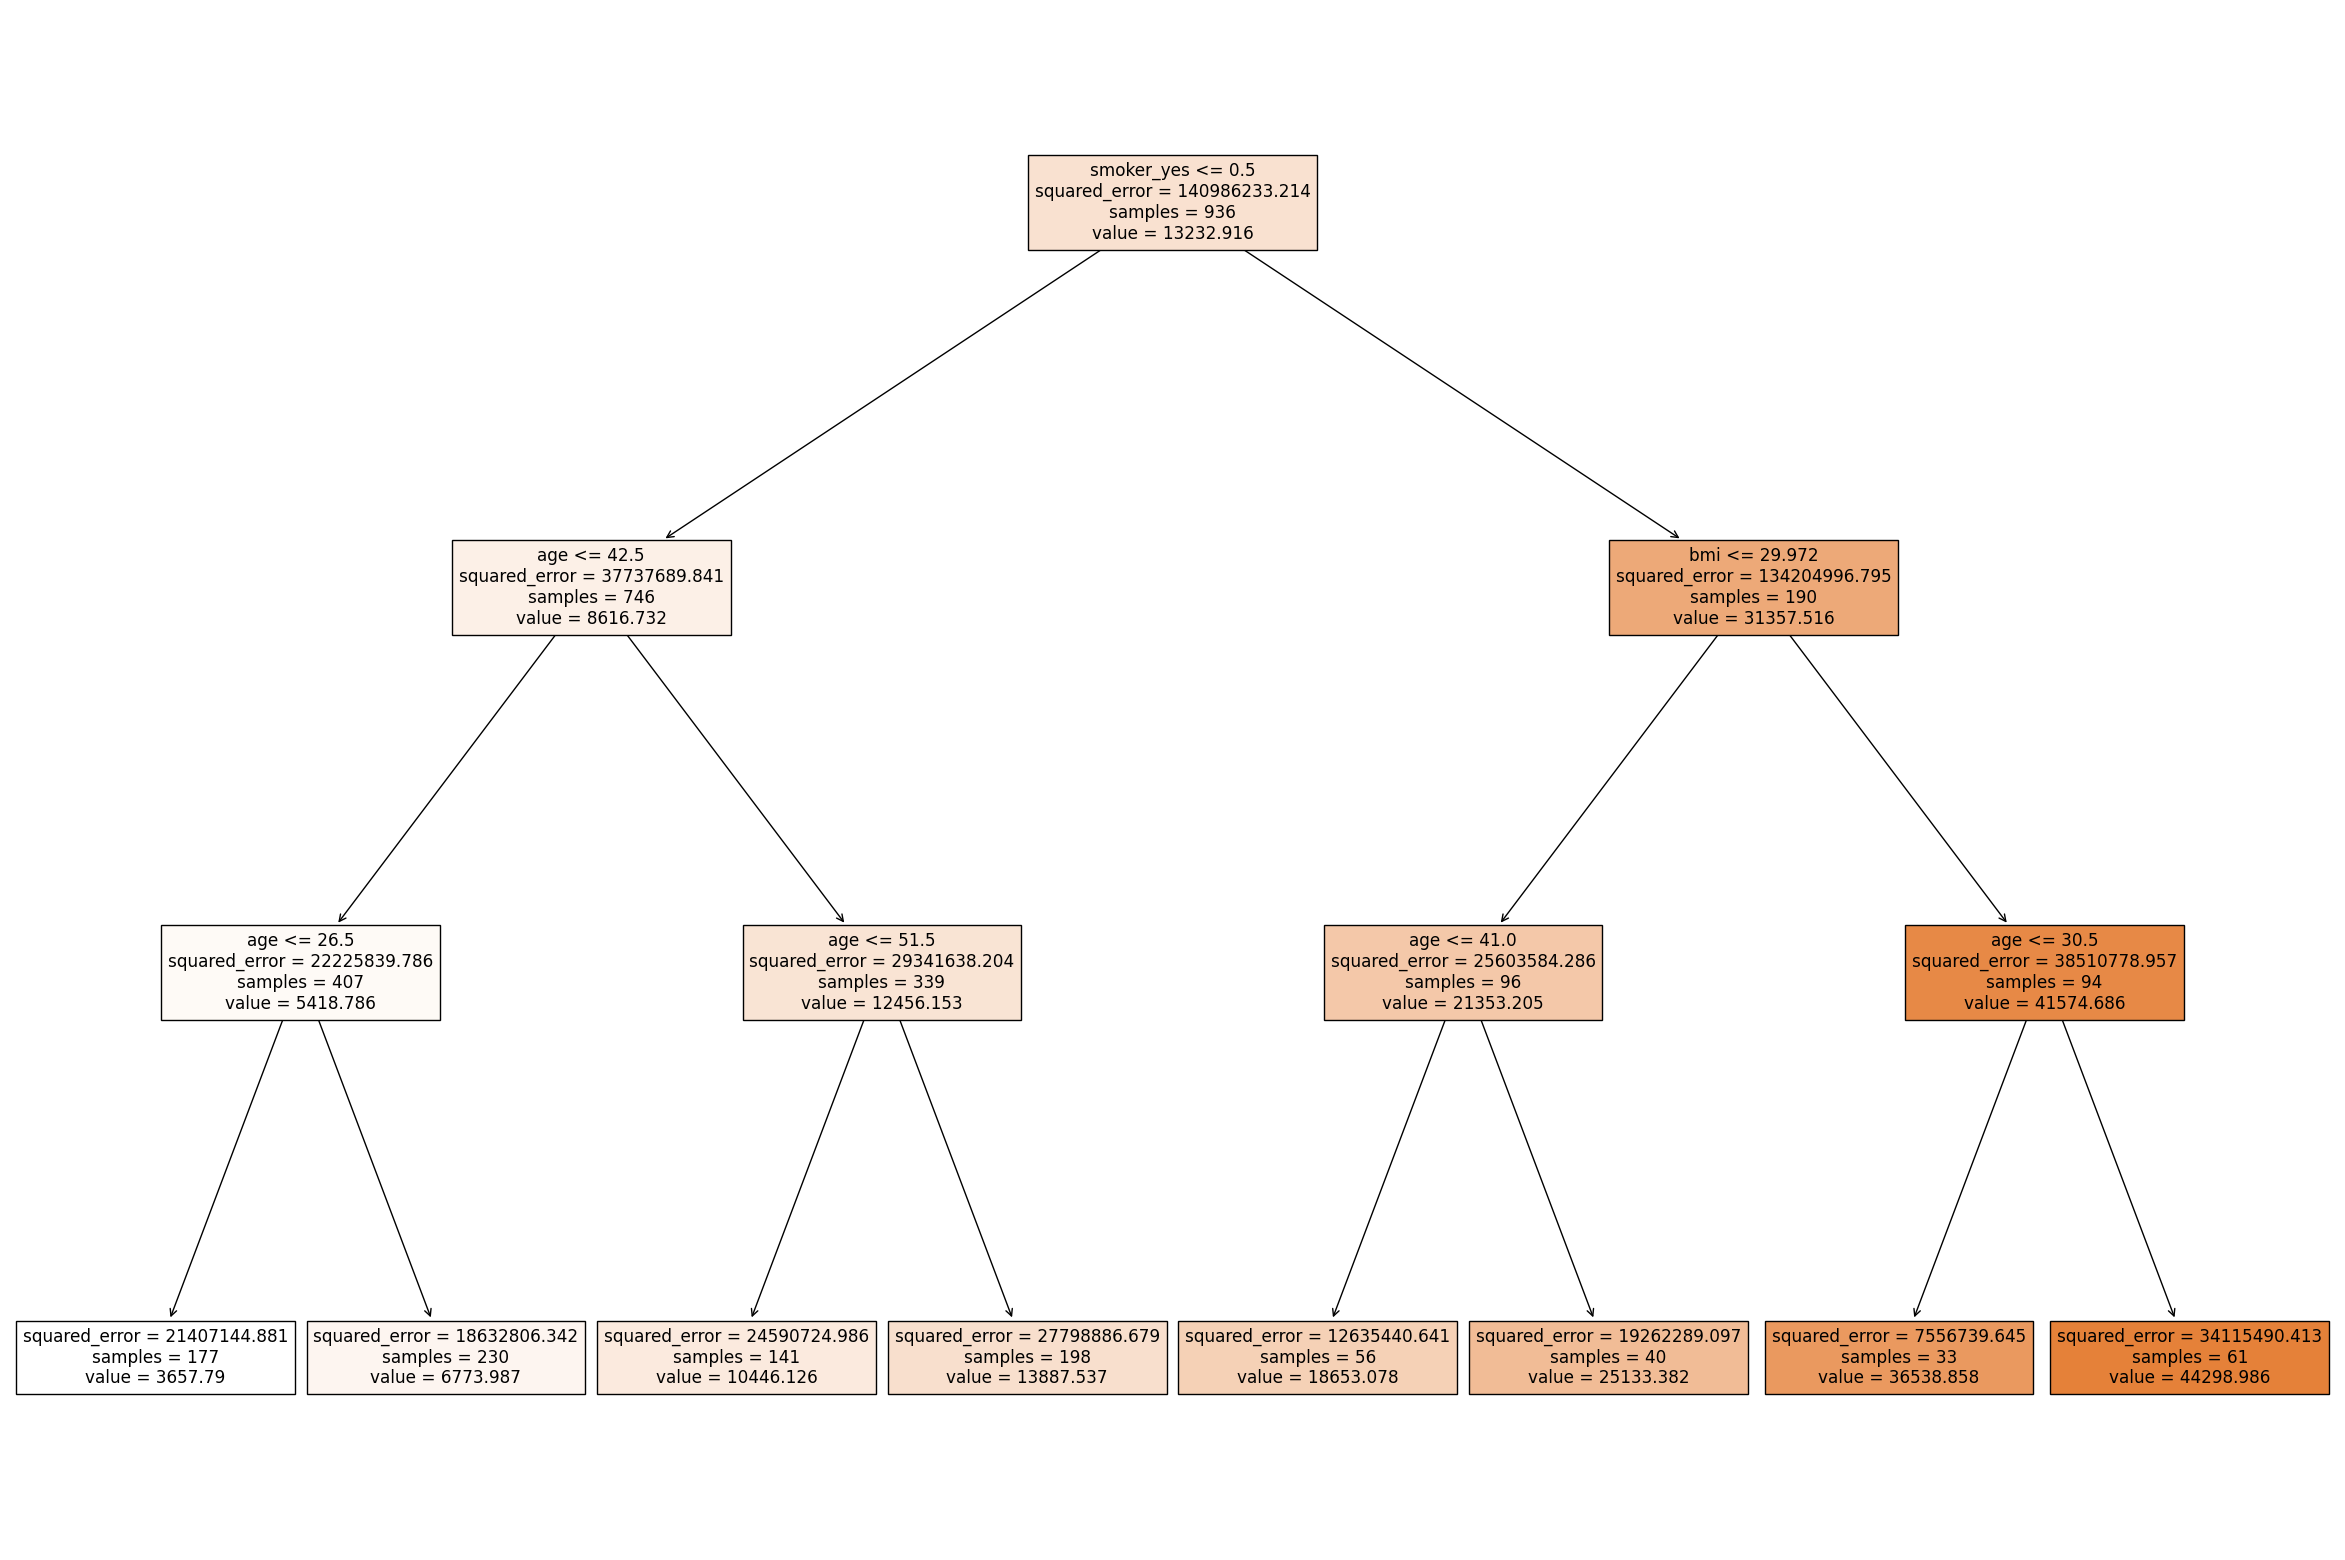

In [212]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model5,
               feature_names=list(predictors_train.columns),
               filled=True)

In [213]:
# Make predictions on testing data
prediction_on_test = model5.predict(predictors_test)

In [214]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 2717.5186267764243
RMSE: 4462.8813672734095


Q5. How do you describe the performance of the regression tree compared to the previous models?

the regression tree preforms the best amongst all the previous model as it gives us a lower MAE and RMSE compared to the other models.

Q6. Similar to decision tree, KNN can also be adjusted to do numeric prediction (think how!). Your task is to train and test a KNN model for numeric prediction. Note that KNN exists as KNeighborsRegressor class, in "neighbors" module of the scikit-learn (sklearn) library in Python. Trying different k's, what number of neighbors will result in best results? (Try k in range(1,15))

For k = 1:
MAE: 7151.794257435324
RMSE: 12922.694693699554
For k = 2:
MAE: 7421.797597651741
RMSE: 11484.103585259956
For k = 3:
MAE: 7506.625369596186
RMSE: 11287.704886816628
For k = 4:
MAE: 7617.598314574628
RMSE: 11032.439923282443
For k = 5:
MAE: 7590.1832474602
RMSE: 10858.923239517682
For k = 6:
MAE: 7923.626266369817
RMSE: 11081.340589885343
For k = 7:
MAE: 8098.124767524165
RMSE: 11212.78764886201
For k = 8:
MAE: 8245.706348177238
RMSE: 11339.910062858095
For k = 9:
MAE: 8269.015738071033
RMSE: 11314.260858005227
For k = 10:
MAE: 8281.736384079602
RMSE: 11307.61828034278
For k = 11:
MAE: 8425.818902521709
RMSE: 11334.841937125904
For k = 12:
MAE: 8512.820784855307
RMSE: 11409.958084054939
For k = 13:
MAE: 8596.950079210295
RMSE: 11432.124721493085
For k = 14:
MAE: 8746.478219807037
RMSE: 11530.659989928747


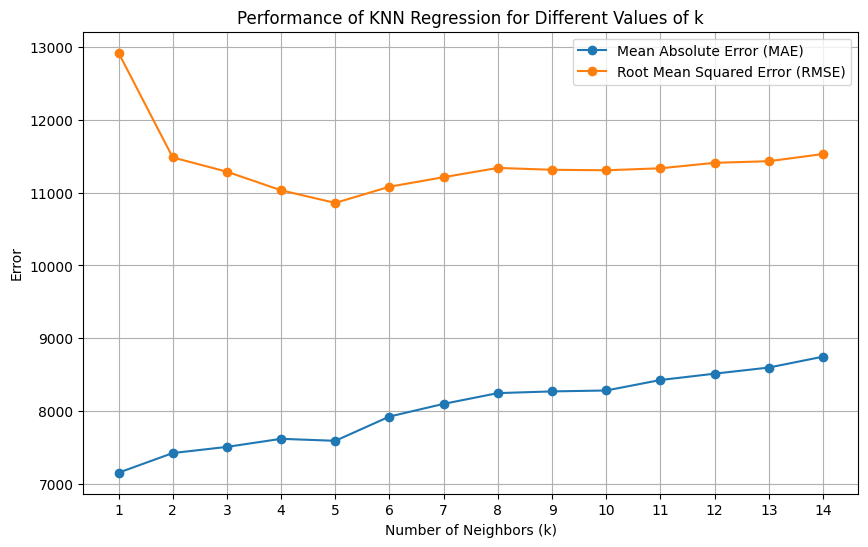

In [215]:
from sklearn.neighbors import KNeighborsRegressor
k_values = []
MAE_values = []
RMSE_values = []
for k in range(1, 15):
 Model6 = KNeighborsRegressor(n_neighbors=k)
 Model6.fit(predictors_train, target_train)
 prediction_on_test = Model6.predict(predictors_test)
 MAE = mean_absolute_error(target_test, prediction_on_test)
 RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
 k_values.append(k)
 MAE_values.append(MAE)
 RMSE_values.append(RMSE)
 print(f"For k = {k}:")
 print("MAE:", MAE)
 print("RMSE:", RMSE)



plt.figure(figsize=(10, 6))
plt.plot(k_values, MAE_values, marker='o', label='Mean Absolute Error (MAE)')
plt.plot(k_values, RMSE_values, marker='o', label='Root Mean Squared Error (RMSE)')
plt.title('Performance of KNN Regression for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


the best result will be obtained by K = 5 as it gives the best combination of MAE: 7590.1832474602
RMSE: 10858.923239517682

In [217]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Insurance.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Insurance.ipynb to html
[NbConvertApp] Writing 1268103 bytes to /content/drive/MyDrive/Insurance.html
